# 6章 学習に関するテクニック

## 6.1 パラメータの更新

### 6.1.2 SGD

In [23]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.3 SGD の欠点

$$
f(x,y)=\frac{1}{20}x^{2}+y^{2}
$$

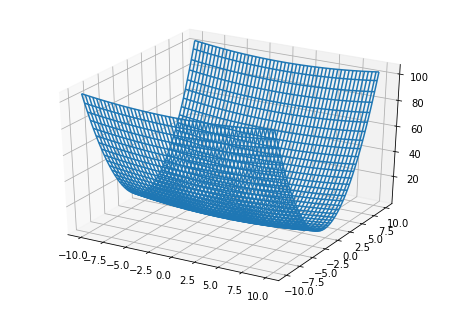

In [156]:
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)
Z = X**2 / 20. + Y**2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

In [72]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [147]:
def calc_and_draw(optimizer):
    params = {}
    params['x'] = -7.0
    params['y'] = 2.0
    def dfx(x):
        return x / 10.
    def dfy(y):
        return 2. * y
    grads = {}
    list_x = []
    list_y = []
    list_x.append(params['x'])
    list_y.append(params['y'])
    list_grads_x = []
    list_grads_y = []
    num_iters = 30
    for i in range(num_iters):
        grads['x'] = dfx(params['x'])
        grads['y'] = dfy(params['y'])
        optimizer.update(params, grads)
        list_x.append(params['x'])
        list_y.append(params['y'])
        list_grads_x.append(grads['x'])
        list_grads_y.append(grads['y'])

    plt.plot(list_x, list_y, marker='o')
    axis([-10, 10, -10, 10])
    for i in range(-10, 10):
        for j in range(-10, 10):
            plt.quiver(i,j,-dfx(i),-dfy(j),angles='xy',scale_units='xy',scale=10)
        
    x = arange(-10, 10, 0.1)
    y = arange(-10, 10, 0.1)

    X, Y = meshgrid(x, y) 
    Z = X**2 / 20. + Y**2

    plt.contour(X, Y, Z, levels=[1, 2, 3, 4, 5, 6, 7])

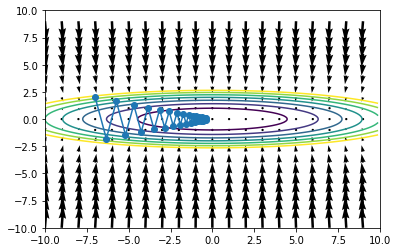

In [148]:
calc_and_draw(SGD(lr=0.95))

### Momentum

$$
{\bf v}\leftarrow\alpha{\bf v}-\eta\frac{\partial L}{\partial \bf W}
$$

$$
{\bf W}\leftarrow{\bf W}+{\bf v}
$$

In [43]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.90):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

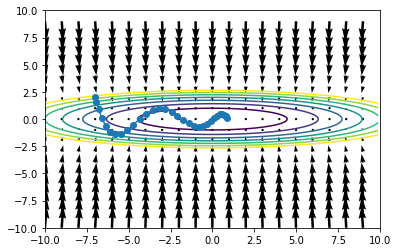

In [149]:
calc_and_draw(Momentum(lr=0.1))

### 6.1.5 AdaGrad

$$
{\bf h}\leftarrow {\bf h}+\frac{\partial L}{\partial \bf W}\odot \frac{\partial L}{\partial \bf W}
$$

$$
{\bf W}\leftarrow {\bf W}-\eta\frac{1}{\sqrt{\bf h}}\frac{\partial L}{\partial \bf W}
$$

In [63]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / np.sqrt(self.h[key] + 1e-7)

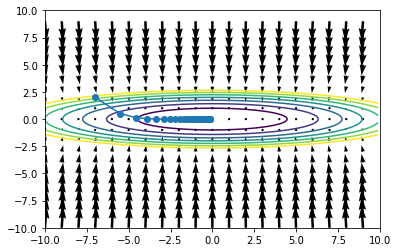

In [150]:
calc_and_draw(AdaGrad(lr=1.5))

### 6.1.6 Adam

In [73]:
import os, sys
sys.path.append(os.pardir)
from common.optimizer import Adam

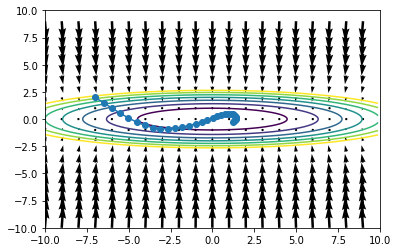

In [151]:
calc_and_draw(Adam(lr=0.5))

### 6.1.8 MNIST データセットによる更新手法の比較

In [104]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [105]:
def get_train_loss_list(optimizer):
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
    
    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

    iters_num = 10000
    train_size = x_train.shape[0]
    batch_size = 100
    learning_rate = 0.1
    train_loss_list = []
    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grad = network.gradient(x_batch, t_batch)

        #for key in ('W1', 'b1', 'W2', 'b2'):
        #    network.params[key] -= learning_rate * grad[key]
        optimizer.update(network.params, grad)

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)
    return train_loss_list

In [124]:
loss_list_sgd = get_train_loss_list(SGD())
loss_list_momentum = get_train_loss_list(Momentum())
loss_list_adagrad = get_train_loss_list(AdaGrad())
loss_list_adam = get_train_loss_list(Adam())

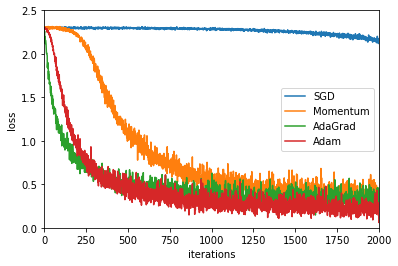

In [128]:
plt.plot(loss_list_sgd, label="SGD")
plt.plot(loss_list_momentum, label="Momentum")
plt.plot(loss_list_adagrad, label="AdaGrad")
plt.plot(loss_list_adam, label="Adam")
plt.xlabel("iterations")
plt.ylabel("loss")
axis([0, 2000, 0.0, 2.5])
plt.legend()

## 6.2 重みの初期値

### 6.2.2 隠れ層のアクティベーション分布

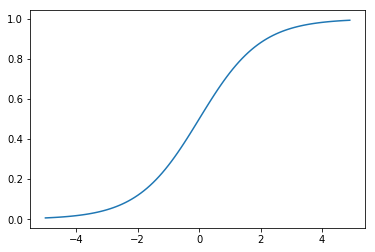

In [23]:
plt.plot(np.arange(-5,5,0.1), sigmoid(np.arange(-5,5,0.1)))

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000, 100)

node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
        
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

(array([  4.00000000e+00,   7.00000000e+00,   1.70000000e+01,
          5.50000000e+01,   1.64000000e+02,   4.09000000e+02,
          8.28000000e+02,   1.79900000e+03,   3.16900000e+03,
          5.37000000e+03,   8.13100000e+03,   1.06530000e+04,
          1.25220000e+04,   1.31400000e+04,   1.27570000e+04,
          1.03590000e+04,   8.15800000e+03,   5.55500000e+03,
          3.41600000e+03,   1.88000000e+03,   9.23000000e+02,
          4.02000000e+02,   1.81000000e+02,   6.50000000e+01,
          2.60000000e+01,   7.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([-45.20335323, -41.86319892, -38.52304462, -35.18289031,
        -31.842736  , -28.50258169, -25.16242738, -21.82227307,
        -18.48211877, -15.14196446, -11.80181015,  -8.46165584,
         -5.12150153,  -1.78134722,   1.55880709,   4.89896139,
          8.2391157 ,  11.57927001,  14.91942432,  18.25957863,
         21.59973294,  24.93988725,  28.28004155,  31.6201

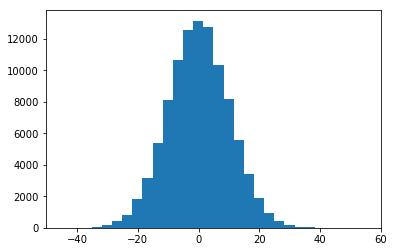

In [49]:
x = np.random.randn(1000, 100)
w = np.random.randn(100, 100) * 1
z = np.dot(x, w)
hist(z.flatten(), 30)

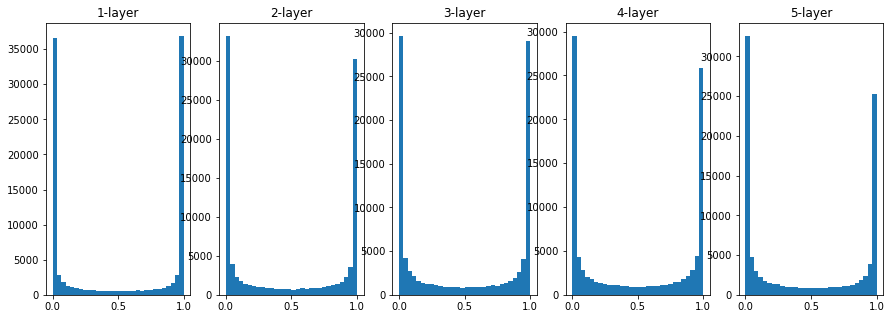

In [50]:
plt.figure(figsize=(15,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000, 100)

node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
        
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

(array([  6.00000000e+00,   1.20000000e+01,   2.40000000e+01,
          6.00000000e+01,   1.69000000e+02,   4.00000000e+02,
          8.02000000e+02,   1.56900000e+03,   2.68900000e+03,
          4.41500000e+03,   6.41600000e+03,   8.84900000e+03,
          1.06100000e+04,   1.19470000e+04,   1.19560000e+04,
          1.12340000e+04,   9.53200000e+03,   7.21800000e+03,
          5.05300000e+03,   3.10300000e+03,   1.88700000e+03,
          1.09900000e+03,   5.21000000e+02,   2.57000000e+02,
          1.10000000e+02,   3.50000000e+01,   1.30000000e+01,
          1.00000000e+01,   2.00000000e+00,   2.00000000e+00]),
 array([-0.43313758, -0.40260481, -0.37207203, -0.34153926, -0.31100649,
        -0.28047371, -0.24994094, -0.21940817, -0.18887539, -0.15834262,
        -0.12780985, -0.09727707, -0.0667443 , -0.03621153, -0.00567875,
         0.02485402,  0.05538679,  0.08591957,  0.11645234,  0.14698511,
         0.17751789,  0.20805066,  0.23858343,  0.26911621,  0.29964898,
         0.33

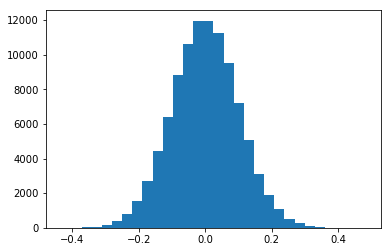

In [46]:
x = np.random.randn(1000, 100)
w = np.random.randn(100, 100) * 0.01
z = np.dot(x, w)
hist(z.flatten(), 30)

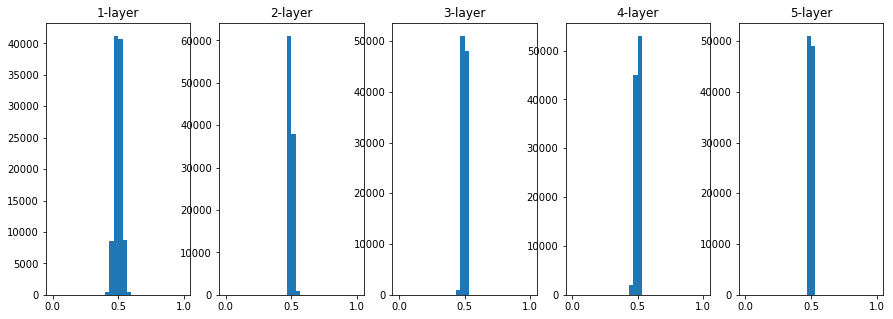

In [47]:
plt.figure(figsize=(15,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000, 100)

node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
        
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

(array([  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          9.00000000e+00,   2.80000000e+01,   8.90000000e+01,
          1.81000000e+02,   4.23000000e+02,   8.17000000e+02,
          1.62600000e+03,   2.75400000e+03,   4.54500000e+03,
          6.48500000e+03,   8.71000000e+03,   1.08440000e+04,
          1.20810000e+04,   1.18810000e+04,   1.11940000e+04,
          9.43800000e+03,   7.06700000e+03,   4.95500000e+03,
          3.12000000e+03,   1.88800000e+03,   9.63000000e+02,
          5.15000000e+02,   2.36000000e+02,   9.10000000e+01,
          4.10000000e+01,   9.00000000e+00,   3.00000000e+00]),
 array([-4.85330273, -4.5517221 , -4.25014146, -3.94856083, -3.6469802 ,
        -3.34539956, -3.04381893, -2.7422383 , -2.44065766, -2.13907703,
        -1.8374964 , -1.53591576, -1.23433513, -0.9327545 , -0.63117386,
        -0.32959323, -0.0280126 ,  0.27356804,  0.57514867,  0.8767293 ,
         1.17830994,  1.47989057,  1.7814712 ,  2.08305184,  2.38463247,
         2.68

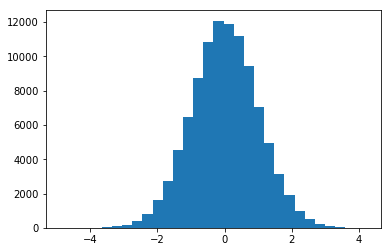

In [43]:
x = np.random.randn(1000, 100)
w = np.random.randn(100, 100) / np.sqrt(100)
z = np.dot(x, w)
hist(z.flatten(), 30)

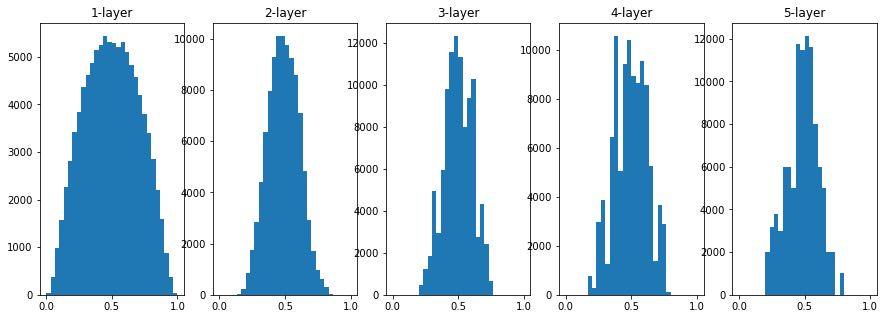

In [44]:
plt.figure(figsize=(15,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.3 ReLU の場合の重みの初期値

In [17]:
def relu(x):
    return np.maximum(0, x)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000, 100)

node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num) * np.sqrt(2)
        
    z = np.dot(x, w)
    #a = sigmoid(z)
    a = relu(z)
    activations[i] = a

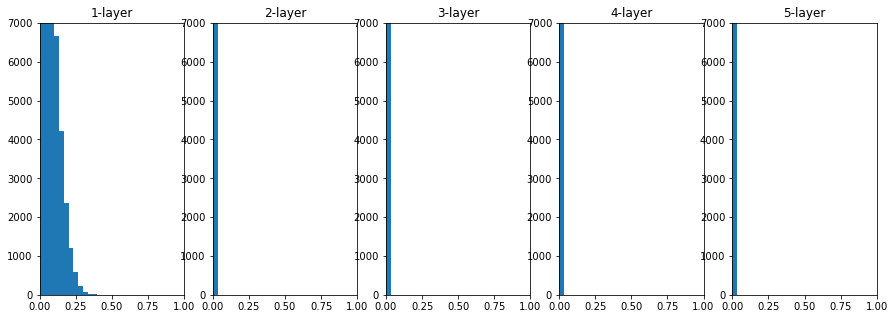

In [39]:
plt.figure(figsize=(15,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    axis([0, 1.0, 0.0, 7000.0])
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000, 100)

node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num) * np.sqrt(2)
        
    z = np.dot(x, w)
    #a = sigmoid(z)
    a = relu(z)
    activations[i] = a

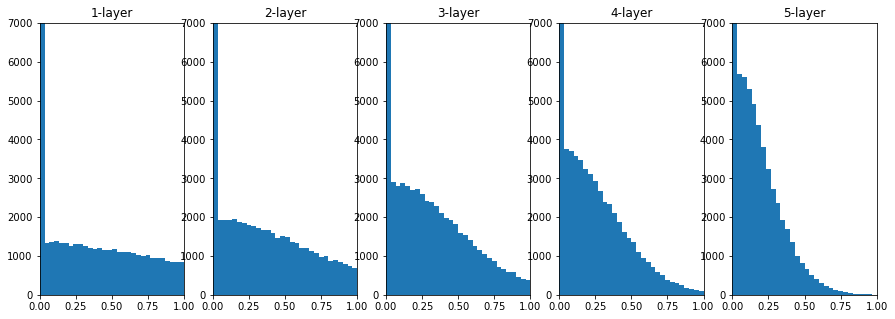

In [41]:
plt.figure(figsize=(15,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    axis([0, 1.0, 0.0, 7000.0])
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000, 100)

node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) * np.sqrt(2)
        
    z = np.dot(x, w)
    #a = sigmoid(z)
    a = relu(z)
    activations[i] = a

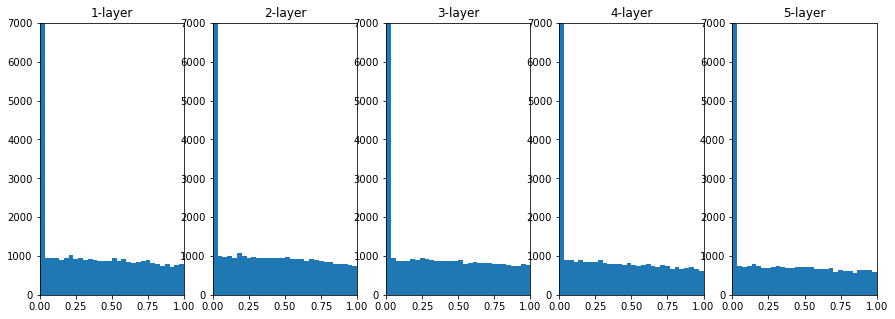

In [52]:
plt.figure(figsize=(15,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    axis([0, 1.0, 0.0, 7000.0])
plt.show()

### 6.2.4 MNIST データセットによる重み初期値の比較

In [58]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [59]:
def get_train_loss_list2(optimizer, weight_type):
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True)
    
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                            output_size=10, weight_init_std=weight_type)

    iters_num = 2000
    train_size = x_train.shape[0]
    batch_size = 128
    train_loss_list = []
    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grad = network.gradient(x_batch, t_batch)

        optimizer.update(network.params, grad)

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)
    return train_loss_list

In [65]:
loss_list_std001 = get_train_loss_list2(SGD(), 0.01)
loss_list_xavier = get_train_loss_list2(SGD(), 'sigmoid')
loss_list_he = get_train_loss_list2(SGD(), 'relu')

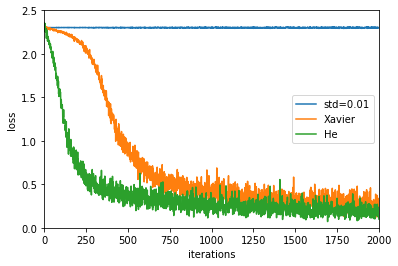

In [66]:
plt.plot(loss_list_std001, label="std=0.01")
plt.plot(loss_list_xavier, label="Xavier")
plt.plot(loss_list_he, label="He")
plt.xlabel("iterations")
plt.ylabel("loss")
axis([0, 2000, 0.0, 2.5])
plt.legend()

## 6.3 Batch Normalization

### 6.3.1 Batch Normalization のアルゴリズム

$$
\mu_{B}\leftarrow\frac{1}{m}\sum_{i=1}^{m} x_{i}
$$

$$
\sigma^{2}_{B}\leftarrow\frac{1}{m}\sum_{i=1}^{m} (x_{i}-\mu_{B})^{2}
$$

$$
\hat{x_{i}}\leftarrow\frac{x_{i}-\mu_{B}}{\sqrt{\sigma^{2}_{B}+\epsilon}}
$$

$$
y_{i}\leftarrow\gamma \hat{x_{i}}+\beta
$$

In [76]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100, 100, 100, 100],
                                     output_size=10, weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100, 100, 100, 100],
                                     output_size=10, weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
            
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            
            #print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
            
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
        
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============


../common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/ando/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


============== 2/16 ==============
============== 3/16 ==============
============== 4/16 ==============
============== 5/16 ==============
============== 6/16 ==============
============== 7/16 ==============
============== 8/16 ==============
============== 9/16 ==============
============== 10/16 ==============
============== 11/16 ==============
============== 12/16 ==============
============== 13/16 ==============
============== 14/16 ==============
============== 15/16 ==============
============== 16/16 ==============


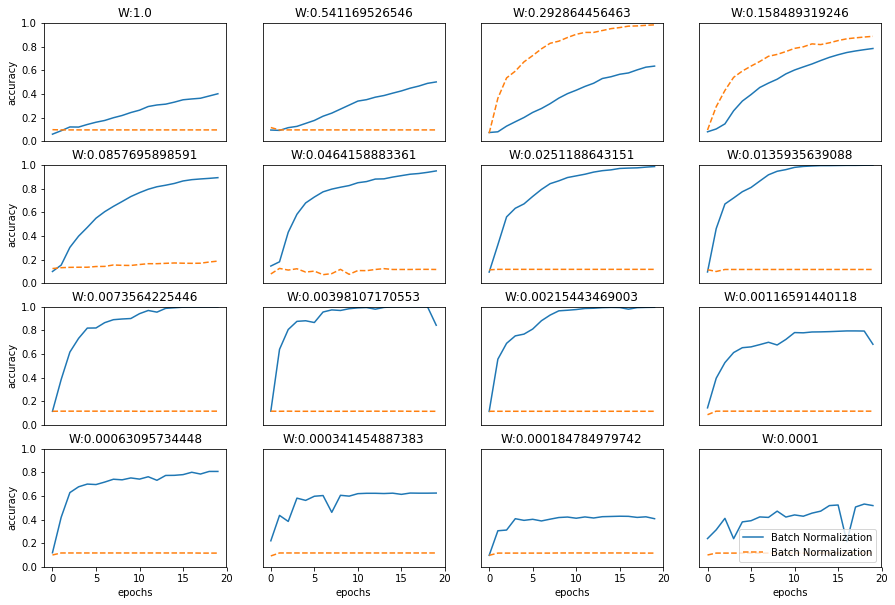

In [77]:
plt.figure(figsize=(15,10))
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w))
    
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", label='Batch Normalization', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)
        
    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc="lower right")

### 6.3.2 Batch Normalization の評価

## 6.4 正則化

### 6.4.1 過学習

In [104]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                                     output_size=10)
    optimizer = SGD(lr=learning_rate)
    
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        grads = network.gradient(x_batch, t_batch)
        optimizer.update(network.params, grads)
            
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            test_acc = network.accuracy(x_test, t_test)
            test_acc_list.append(test_acc)
            
            #print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
            
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
        
    return train_acc_list, test_acc_list

In [105]:
train_acc_list, test_acc_list = __train(w)

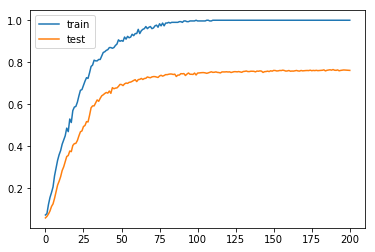

In [107]:
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, label='train')
plt.plot(x, test_acc_list, label='test')
plt.legend()

### 6.4.2 Weight decay

$$
{\bf W}=(w_{1},w_{2},\cdots,w_{n})
$$

$$
L^{p}norm \rightarrow\|{\bf W}\|_{p}=\sqrt[p]{|w_{1}|^{p}+|w_{2}|^{p}+\cdots+|w_{n}|^{p}}
$$

In [99]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
weight_decay_lambda = 0.1

def __train():
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay_lambda)
    optimizer = SGD(lr=learning_rate)
    
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        grads = network.gradient(x_batch, t_batch)
        optimizer.update(network.params, grads)
            
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            test_acc = network.accuracy(x_test, t_test)
            test_acc_list.append(test_acc)
            
            #print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
            
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
        
    return train_acc_list, test_acc_list

In [100]:
train_acc_list, test_acc_list = __train()

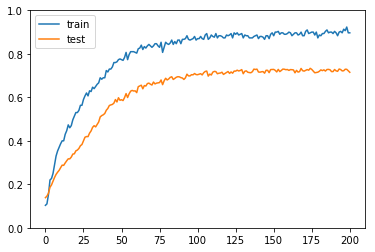

In [103]:
x = np.arange(max_epochs)
plt.ylim(0, 1.0)
plt.plot(x, train_acc_list, label='train')
plt.plot(x, test_acc_list, label='test')
plt.legend()

### 6.4.3 Dropout

overfit_dropout.pyのシーケンス図
<img src="seq_overfit_dropout.png">

In [1]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

In [114]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

use_dropout = True
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                             output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100, optimizer='sgd', optimizer_param={'lr':0.01}, verbose=False)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

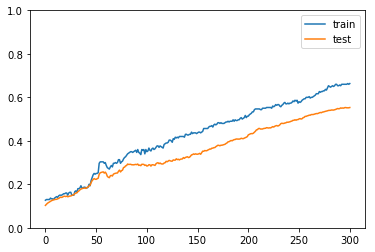

In [115]:
x = np.arange(len(train_acc_list))
plt.ylim(0, 1.0)
plt.plot(x, train_acc_list, label='train')
plt.plot(x, test_acc_list, label='test')
plt.legend()

## 6.5 ハイパーパラメータの検証

### 6.5.1 検証データ

In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.2 ハイパーパラメータの最適化

### 6.5.3 ハイパーパラメータ最適化の実装